<h1 align="center"><font size="5">Using Data Science to Understand Data Science:<br> A Canada-U.S. Comparison of the Labour Market<br></font></h1>
<h2 align="center"><font size="3">Capstone Project as required for completion of the IBM Data Science Professional Certificate</font></h2>
<p style="text-align:center;"><font size="2"><i>by Nataliia Rudnikova
    <a href="https://www.linkedin.com/in/nataliia-rudnikova">(LinkedIn)</a>
    <a href="https://github.com/nattalliit">(GitHub)</a> </i></font></p>

## Table of contents<a name="ToC"></a>
### Overview
* [Introduction: Data Science in the U.S. & Canada](#introduction)
* [The Data](#data)
* [Preprocessing & Data Visualization](#preprocessing)
* [Machine Learning Modelling](#modelling)
* [Model Evaluation](#evaluation)
* [Discussion and Conclusions](#discussion)

### Code
* [Loading Data & Libraries](#load)
* [Preprocessing](#preprocessingcode)
* [Visualization and Exploratory Data Analysis](#vis+EDA)
* [Modelling & Evaluation](#modellingcode)

## Introduction: Data Science in the U.S. & Canada<a name="introduction"></a>


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kaggle has been surveying professionals working in the field of data science for a few years to improve our understanding of the dynamics of the job market. The datasets available are covering dozens of countries and territories across the world. While the Kaggle community has offered many insights around the case of the United States, there remains a lot to be discovered about data science in Canada. By shedding light specifically on the Canadian data science job market and comparing it with its counterpart in the United States, this data science project will help employers, employees, and candidates better understand the skills needed to become a data scientist, the education that is most common, the job titles they are likely to have, how the salaries are distributed, as well as whether these skills, education, titles, and salaries vary across the two countries.

This is especially relevant in a time where work-from-home arrangements are becoming more prevalent. The current pandemic has brought about major restructurations in the industry. Companies are now looking to hire data scientists across the globe. Understanding the distinct features of a specific labour market should thus be of value for many stakeholders.

## The Data<a name="data"></a>


As mentioned above, the dataset that we will use come from Kaggle. The company conducts an annual survey and this one has been conducted from October 8th to October 28th of the year 2019. Respondents were “found primarily through Kaggle channels, like [their] email list, discussion forums and social media channels” (see: https://www.kaggle.com/c/kaggle-survey-2019/data?select=multiple_choice_responses.csv). In total, there were 19 717 respondents from 171 countries and territories across the globe.

## Preprocessing & Data Visualization <a name="preprocessing"></a>

This section systematically transforms and examines the data. Specifically, the notebook takes the reader through the whole process of this data science project. This includes all of the following steps:

**Preprocessing (ETL) the data:**

>- examining the full dataset
>- looking at the question labels of each questions to ensure a thorough understanding of the dataset
>- selecting features of interest
>- dropping the first row of the dataset, which contains question labels
>- examining the data types to ensure they are properly formatted
>- excluding students and unemployed individuals from the dataframe since we are seeking to examine the structure of the labour market as it stands and not as it may become once these respondents have landed a position in the field
>- creating a new dataframe with a reduced number of features as explained in our report
>- reducing the sample to a subsample including only Canadian and American respondents to fit with the objectives of our analysis
>- renaming the columns so we can intuitively understand the dataframe when looking at it in Python
>- replacing missing values with 0s and non-missing values with 1s in the questions pertaining to the languages used. We are aware that this question will be problematic because of the original format of the variable, which included multiple choice into a single variable which was then split into several dummy variables. We will therefore need to be careful in interpreting results around these features.
>- Dealing with missing values for modelling. In this study, we are simply going to drop the rows containing missing values.

**Data Visualization:**
> For the data visualization and exploratory analysis, we do two kinds of operation:
<br>(1) comparing distributions between Canada and the U.S., and</br>
<br>(2) plotting interesting findings into appealing and (ideally) intuitive visualizations.</br>

>For the coding of visualization, we sometimes use Seaborn and the Tidyverse pipes, the latter of which you can find a neat explanation by Steven Morse [here](https://stmorse.github.io/journal/tidyverse-style-pandas.html)

## Machine Learning Modelling <a name="modelling"></a>

Given the nature of our problem, we build a few models and compare their performance, including:
> * Logistic Regression
> * Support Vector Machine
> * Decision Tree Classification
> * K-Nearest Neighbour

We will then compare their accuracy in predicting whether a sample of data scientists are likely American or Canadian.

<center><h1>Loading Data & Libraries</h1></center><a name="load"></a>

>[Return to table of contents](#ToC)

In [97]:
# Run these if not already installed (remove the hashtags) for the following lines:
#!pip install notebook --upgrade
#!pip install --upgrade matplotlib
#!pip install "notebook>=5.3" "ipywidgets>=7.2"
#!conda install --yes seaborn==0.11.0
# conda install -c anaconda nbformat

# Then, restart the Jupyter IDE

In [98]:
# reset the default configuration for matplotlib
# plt.style.use('default')

In [99]:
#importing relevant libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
import scipy.optimize as opt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
# load the desired Seaborn theme. This mostly changes the background colour.
# To be noted: it changes it for the rest of the notebook and every plot and
# figure produced onwards uses the loaded theme.
import seaborn as sns
sns.set_style("whitegrid")

In [100]:
#loading the datasets
df=pd.read_csv("/content/sample_data/multiple_choice_responses.csv", low_memory = False)
dfQuestions=pd.read_csv("/content/sample_data/questions_only.csv")

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<center><h1>Preprocessing</h1></center><a name="preprocessingcode"></a>

>[Return to table of contents](#ToC)

In [102]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,...,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft SQL Server,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Database,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Access,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Relational Database Service,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS DynamoDB,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Azure SQL Database,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud SQL,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Other,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Other - Text
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [103]:
dfQuestions.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice,...,Which categories of ML tools do you use on a regular basis? (Select all that apply) - Selected Choice,Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice


In [104]:
dfQuestions_transposed=dfQuestions.transpose()

In [105]:
pd.set_option('display.max_colwidth', None)
dfQuestions_transposed

,0
Time from Start to Finish (seconds),Duration (in seconds)
Q1,What is your age (# years)?
Q2,What is your gender? - Selected Choice
Q3,In which country do you currently reside?
Q4,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5,Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q6,What is the size of the company where you are employed?
Q7,Approximately how many individuals are responsible for data science workloads at your place of business?
Q8,Does your current employer incorporate machine learning methods into their business?
Q9,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice


In [106]:
df.drop([0,], inplace=True)
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [107]:
df['Q5'].value_counts(ascending=False)

Q5
Data Scientist             4085
Student                    4014
Software Engineer          2705
Other                      1690
Data Analyst               1598
Research Scientist         1470
Not employed                942
Business Analyst            778
Product/Project Manager     723
Data Engineer               624
Statistician                322
DBA/Database Engineer       156
Name: count, dtype: int64

In [108]:
df['Q3'].value_counts(ascending=False)

Q3
India                                                   4786
United States of America                                3085
Other                                                   1054
Brazil                                                   728
Japan                                                    673
Russia                                                   626
China                                                    574
Germany                                                  531
United Kingdom of Great Britain and Northern Ireland     482
Canada                                                   450
Spain                                                    399
Nigeria                                                  395
France                                                   387
Taiwan                                                   301
Turkey                                                   288
Italy                                                    271
Australia            

In [109]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19717 entries, 1 to 19717
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: object(246)
memory usage: 37.0+ MB


In [111]:
df.dtypes

Time from Start to Finish (seconds)    object
Q1                                     object
Q2                                     object
Q2_OTHER_TEXT                          object
Q3                                     object
                                        ...  
Q34_Part_9                             object
Q34_Part_10                            object
Q34_Part_11                            object
Q34_Part_12                            object
Q34_OTHER_TEXT                         object
Length: 246, dtype: object

In [112]:
df.loc[:, "Q18_Part_1":"Q18_Part_12"]

,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12
1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df[["Q18_Part_1", "Q18_Part_2", "Q18_Part_3"]].describe()

,Q18_Part_1,Q18_Part_2,Q18_Part_3
count,12841,4588,6532
unique,1,1,1
top,Python,R,SQL
freq,12841,4588,6532


In [114]:
# get first five programming languages
df[["Q18_Part_1", "Q18_Part_3", "Q18_Part_4", "Q18_Part_5", "Q18_Part_6"]].describe()

,Q18_Part_1,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6
count,12841,6532,1672,2256,2267
unique,1,1,1,1,1
top,Python,SQL,C,C++,Java
freq,12841,6532,1672,2256,2267


In [115]:
df.loc[:, "Q18_Part_1":"Q18_Part_12"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19717 entries, 1 to 19717
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q18_Part_1   12841 non-null  object
 1   Q18_Part_2   4588 non-null   object
 2   Q18_Part_3   6532 non-null   object
 3   Q18_Part_4   1672 non-null   object
 4   Q18_Part_5   2256 non-null   object
 5   Q18_Part_6   2267 non-null   object
 6   Q18_Part_7   2174 non-null   object
 7   Q18_Part_8   389 non-null    object
 8   Q18_Part_9   2037 non-null   object
 9   Q18_Part_10  1516 non-null   object
 10  Q18_Part_11  0 non-null      object
 11  Q18_Part_12  1148 non-null   object
dtypes: object(12)
memory usage: 1.8+ MB


### Exploring missing values and reducing the dataset

In [116]:
# exploring missing values
df[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q10", "Q14", "Q15", "Q23"]].isna().sum()

Q1        0
Q2        0
Q3        0
Q4      394
Q5      610
Q6     5715
Q7     6094
Q8     6490
Q10    7220
Q14    4027
Q15    4090
Q23    5535
dtype: int64

Here, we exclude students and unemployed respondents because we are mostly interested in the current actors of the data science labour market, not its prospective participants.

In [117]:
df = df[~df['Q5'].isin(["Student", "Not employed"])]

In [118]:
df[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q10", "Q14", "Q15", "Q23"]].isna().sum()

Q1        0
Q2        0
Q3        0
Q4      394
Q5      610
Q6      759
Q7     1138
Q8     1534
Q10    2264
Q14    3309
Q15    3339
Q23    4220
dtype: int64

Here, we select a reduced number of features for the analysis

In [119]:
newdf=df[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q10",
          "Q14", "Q15", "Q18_Part_1", "Q18_Part_2", "Q18_Part_3",
          "Q18_Part_4", "Q18_Part_5", "Q18_Part_6", "Q18_Part_7", "Q18_Part_8",
          "Q18_Part_9", "Q18_Part_10", "Q18_Part_11", "Q18_Part_12", "Q23"]]
newdf.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q14,...,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q23
1,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,1-2 years
2,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., models in production for more than 2 years)","5,000-7,499","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,2-3 years
5,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 1 years


In [120]:
newdf.shape

(14761, 24)

In [121]:
newdf.isna().sum()

Q1                 0
Q2                 0
Q3                 0
Q4               394
Q5               610
Q6               759
Q7              1138
Q8              1534
Q10             2264
Q14             3309
Q15             3339
Q18_Part_1      5398
Q18_Part_2     11109
Q18_Part_3      9333
Q18_Part_4     13812
Q18_Part_5     13405
Q18_Part_6     13163
Q18_Part_7     13041
Q18_Part_8     14408
Q18_Part_9     12998
Q18_Part_10    13799
Q18_Part_11    14761
Q18_Part_12    13745
Q23             4220
dtype: int64

There seems to be an increasing number of missing values as we approach the questions nearing the end of the survey.

In [122]:
newdf.shape

(14761, 24)

In [123]:
# select only the two countries of interest
newdf=newdf[(newdf["Q3"]=="Canada")|(newdf["Q3"]=="United States of America")]
newdf["Q3"].value_counts()

Q3
United States of America    2489
Canada                       355
Name: count, dtype: int64

In [124]:
# verify if the operation was correctly conducted
newdf.shape

(2844, 24)

In [125]:
newdf.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q14,...,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q23
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years
14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
16,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years
22,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
34,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years


In [126]:
newdf["Q3"].value_counts()

Q3
United States of America    2489
Canada                       355
Name: count, dtype: int64

In [127]:
newdf[["Q18_Part_1", "Q18_Part_2", "Q18_Part_3", "Q18_Part_4",
       "Q18_Part_5", "Q18_Part_6", "Q18_Part_7", "Q18_Part_8", "Q18_Part_9",
       "Q18_Part_10", "Q18_Part_11", "Q18_Part_12"]].describe()

,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12
count,1831,898,1294,133,220,237,331,65,491,171,0,288
unique,1,1,1,1,1,1,1,1,1,1,0,1
top,Python,R,SQL,C,C++,Java,Javascript,TypeScript,Bash,MATLAB,NaN,Other
freq,1831,898,1294,133,220,237,331,65,491,171,NaN,288


In [128]:
newdf.rename(columns={"Q1":"age", "Q2":"gender", "Q3":"country", "Q4":"education", "Q5":"job", "Q6":"cpny_size",
                      "Q7":"team_size", "Q8":"ML_methods", "Q10":"salary","Q14":"primary_tool", "Q15":"coding_exp",
                      "Q18_Part_1":"Python", "Q18_Part_2":"R", "Q18_Part_3":"SQL", "Q18_Part_4":"C",
                      "Q18_Part_5":"C++", "Q18_Part_6":"Java", "Q18_Part_7":"JavaScript", "Q18_Part_8":"TypeScript",
                     "Q18_Part_9":"Bash", "Q18_Part_10":"MATLAB", "Q18_Part_11":"None", "Q18_Part_12":"Other",
                     "Q23":"ML_yrs"}, inplace=True)
newdf.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years
14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
16,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years
22,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
34,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years


In [129]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 8 to 19434
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           2844 non-null   object
 1   gender        2844 non-null   object
 2   country       2844 non-null   object
 3   education     2794 non-null   object
 4   job           2763 non-null   object
 5   cpny_size     2728 non-null   object
 6   team_size     2658 non-null   object
 7   ML_methods    2603 non-null   object
 8   salary        2435 non-null   object
 9   primary_tool  2271 non-null   object
 10  coding_exp    2265 non-null   object
 11  Python        1831 non-null   object
 12  R             898 non-null    object
 13  SQL           1294 non-null   object
 14  C             133 non-null    object
 15  C++           220 non-null    object
 16  Java          237 non-null    object
 17  JavaScript    331 non-null    object
 18  TypeScript    65 non-null     object
 19  Bash      

Here, we transform missing values into 0s and values not missing into 1s

<center><h1>Visualization and Exploratory Analysis</h1></center><a name="vis+EDA"></a>

>[Return to table of contents](#ToC)

In [130]:
newdf=newdf.reset_index(drop=True)

In [131]:
newdf.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs
0,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years
1,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
2,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years
3,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
4,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years


In [132]:
newdf.loc[:, "Python":"Other"]

,Python,R,SQL,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other
0,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
grpdf=newdf[["country", "Python", "R", "SQL", "C", "C++", "Java",
             "JavaScript", "TypeScript", "Bash", "MATLAB", "None", "Other"]]

In [134]:
grpdf["country"].replace({"Canada":1, "United States of America":0})

0       0
1       0
2       0
3       0
4       0
       ..
2839    1
2840    0
2841    1
2842    0
2843    0
Name: country, Length: 2844, dtype: int64

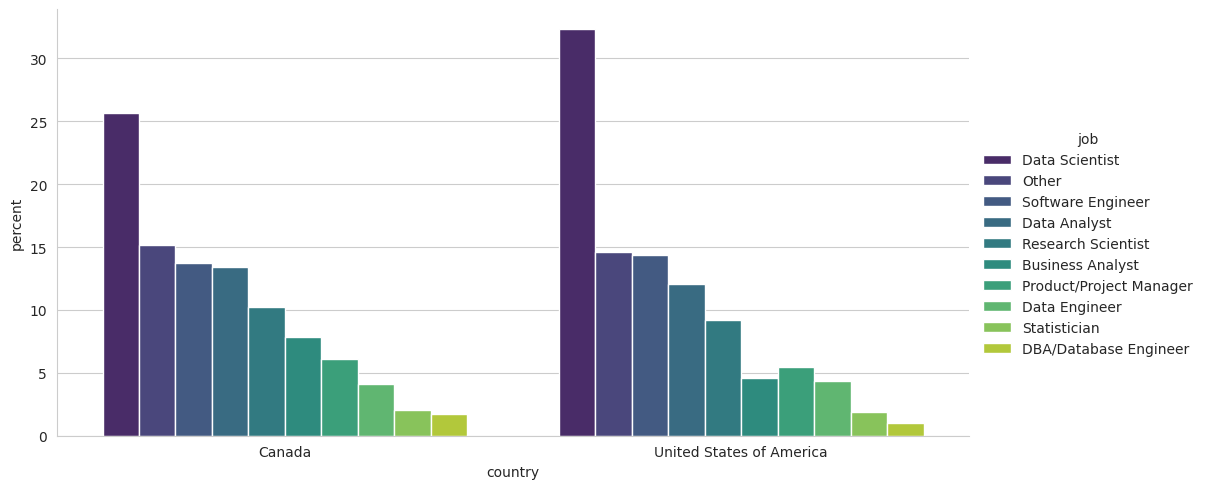

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'job'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'),
       x=x,y='percent',
       hue=y,kind='bar',
       height=5, aspect=2,
       palette="viridis")
 .savefig("Data Science Jobs.png"))


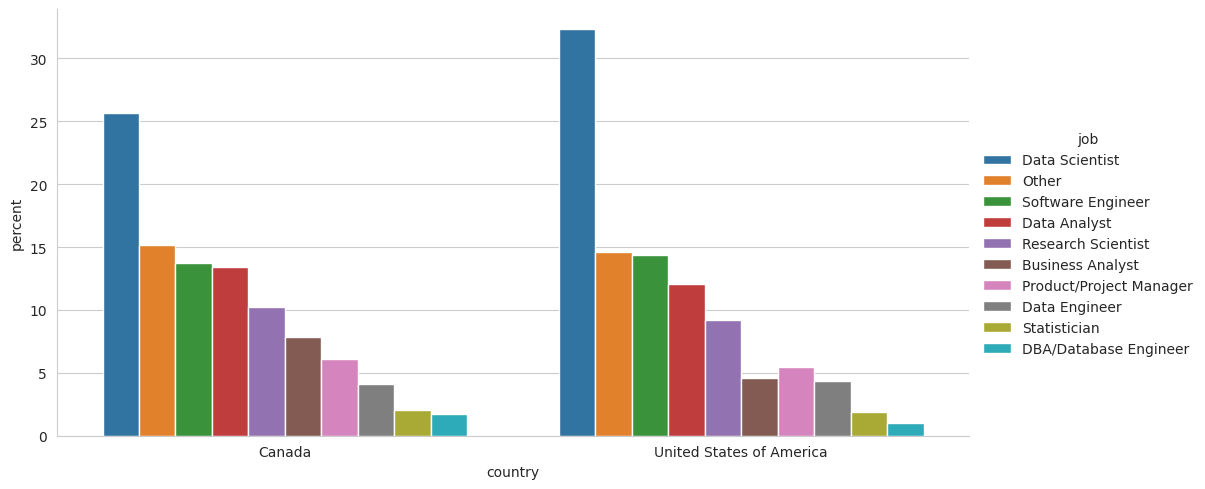

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'job'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'),
       x=x,y='percent',
       hue=y,kind='bar',
       height=5, aspect=2,)
 .savefig("Data Science Title.png"))

In [137]:
(dfvis
.groupby('country')['job']
.value_counts(ascending=False, normalize=True)
.mul(100))

country                   job                    
Canada                    Data Scientist             25.655977
                          Other                      15.160350
                          Software Engineer          13.702624
                          Data Analyst               13.411079
                          Research Scientist         10.204082
                          Business Analyst            7.871720
                          Product/Project Manager     6.122449
                          Data Engineer               4.081633
                          Statistician                2.040816
                          DBA/Database Engineer       1.749271
United States of America  Data Scientist             32.314050
                          Other                      14.628099
                          Software Engineer          14.380165
                          Data Analyst               12.024793
                          Research Scientist          9.214876
     

In [138]:
newdf.columns

Index(['age', 'gender', 'country', 'education', 'job', 'cpny_size',
       'team_size', 'ML_methods', 'salary', 'primary_tool', 'coding_exp',
       'Python', 'R', 'SQL', 'C', 'C++', 'Java', 'JavaScript', 'TypeScript',
       'Bash', 'MATLAB', 'None', 'Other', 'ML_yrs'],
      dtype='object')

In [139]:
newdf2=newdf[['age', 'gender', 'country', 'education', 'job', 'cpny_size',
              'team_size', 'ML_methods','salary', 'primary_tool', 'coding_exp', 'ML_yrs']]

In [140]:
newdf.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs
0,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years
1,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
2,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years
3,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
4,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years


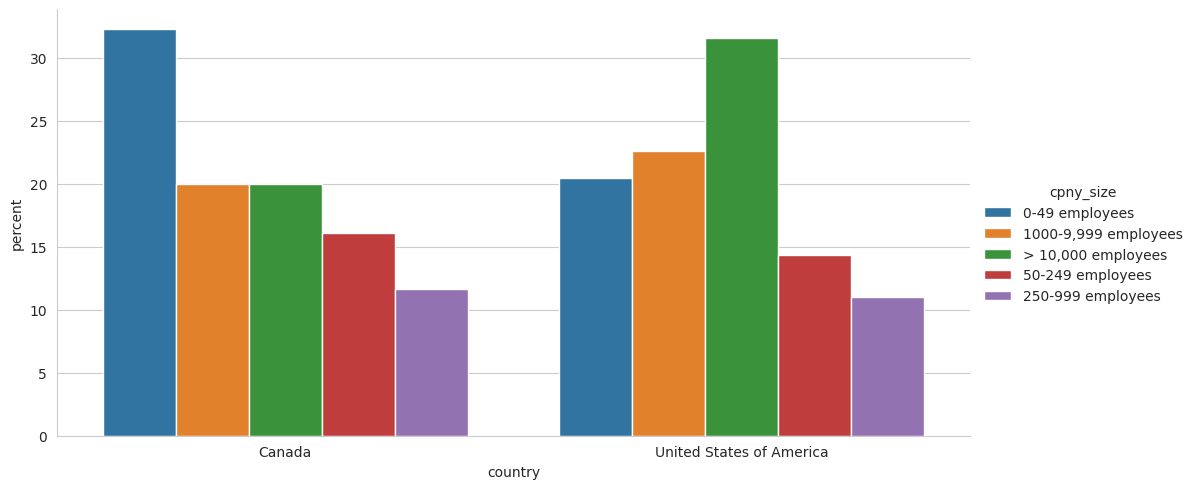

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'cpny_size'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'),
       x=x,y='percent',
       hue=y,kind='bar',
       height=5, aspect=2,)
 .savefig("company size.png"))

In [142]:
(dfvis
.groupby('country')['cpny_size']
.value_counts(ascending=False, normalize=True)
.mul(100))

country                   cpny_size           
Canada                    0-49 employees          32.238806
                          1000-9,999 employees    20.000000
                          > 10,000 employees      20.000000
                          50-249 employees        16.119403
                          250-999 employees       11.641791
United States of America  > 10,000 employees      31.550355
                          1000-9,999 employees    22.607606
                          0-49 employees          20.434601
                          50-249 employees        14.375261
                          250-999 employees       11.032177
Name: proportion, dtype: float64

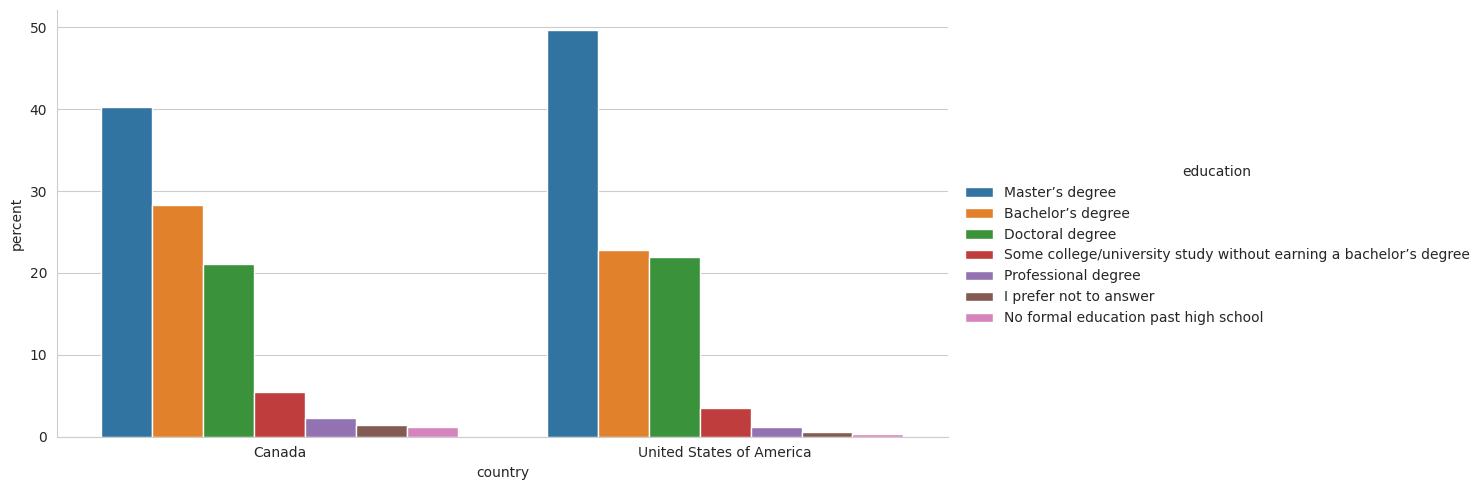

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'education'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'),
       x=x,y='percent',
       hue=y,kind='bar',
       height=5, aspect=2,)
.savefig("education.png"))

In [144]:
(dfvis
.groupby('country')['education']
.value_counts(ascending=False, normalize=True)
.mul(100))

country                   education                                                        
Canada                    Master’s degree                                                      40.285714
                          Bachelor’s degree                                                    28.285714
                          Doctoral degree                                                      21.142857
                          Some college/university study without earning a bachelor’s degree     5.428571
                          Professional degree                                                   2.285714
                          I prefer not to answer                                                1.428571
                          No formal education past high school                                  1.142857
United States of America  Master’s degree                                                      49.631751
                          Bachelor’s degree                         

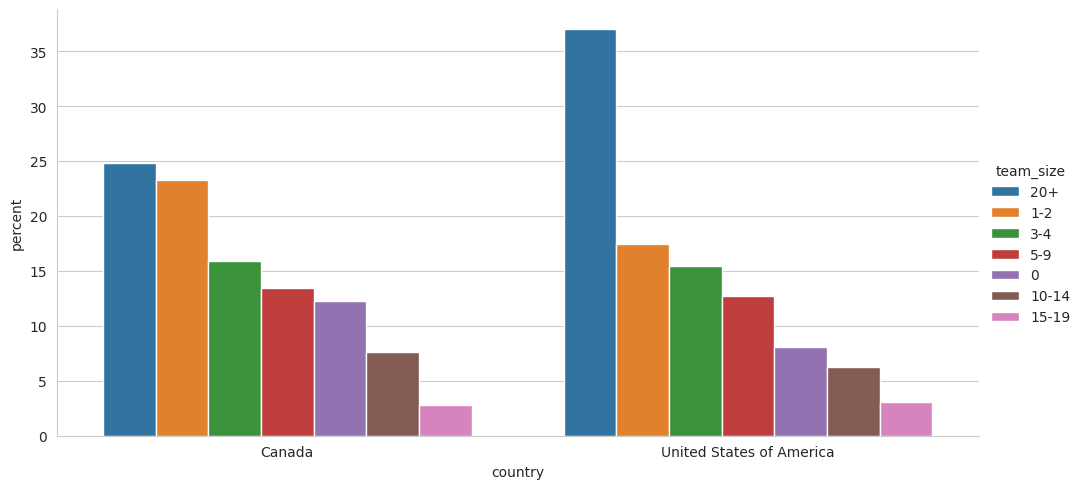

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'team_size'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'),
       x=x,y='percent',
       hue=y,kind='bar',
       height=5, aspect=2,)
.savefig("team size.png"))

In [146]:
(dfvis
.groupby('country')['team_size']
.value_counts(ascending=False, normalize=True)
.mul(100))

country                   team_size
Canada                    20+          24.770642
                          1-2          23.241590
                          3-4          15.902141
                          5-9          13.455657
                          0            12.232416
                          10-14         7.645260
                          15-19         2.752294
United States of America  20+          36.979837
                          1-2          17.417417
                          3-4          15.444015
                          5-9          12.698413
                          0             8.108108
                          10-14         6.263406
                          15-19         3.088803
Name: proportion, dtype: float64

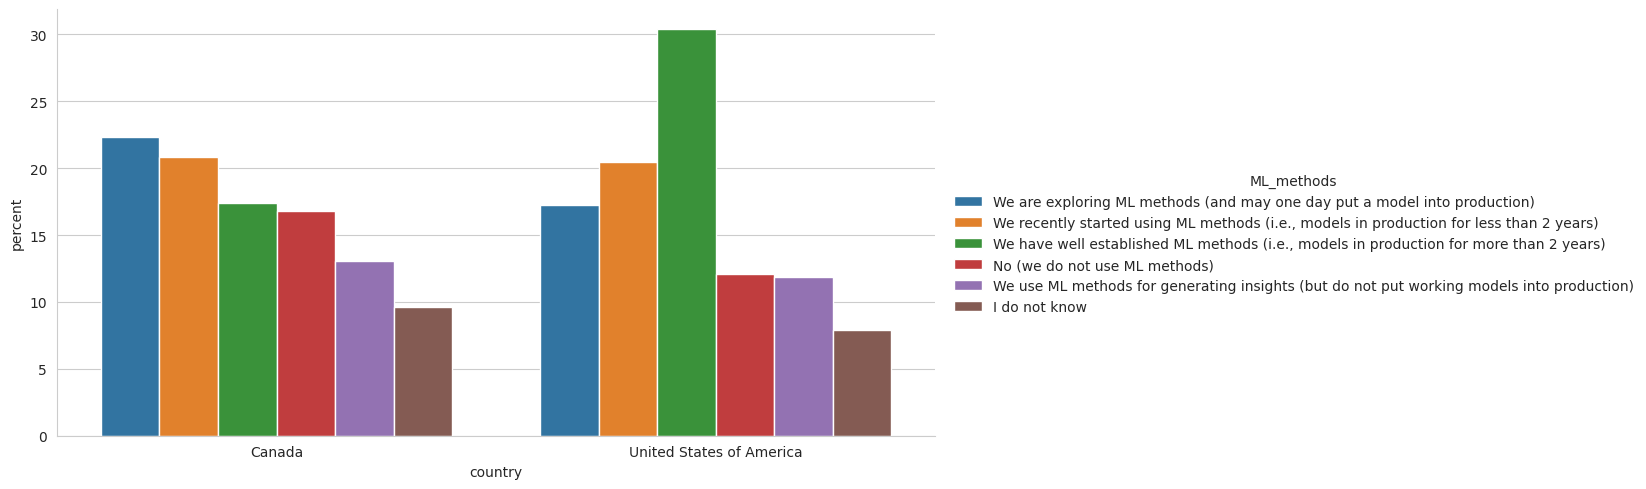

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'ML_methods'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'),
       x=x,y='percent',
       hue=y,kind='bar',
       height=5, aspect=2,)
 .savefig("ML methods.png"))

In [148]:
(dfvis
.groupby('country')['ML_methods']
.value_counts(ascending=False, normalize=True)
.mul(100))

country                   ML_methods                                                                               
Canada                    We are exploring ML methods (and may one day put a model into production)                    22.360248
                          We recently started using ML methods (i.e., models in production for less than 2 years)      20.807453
                          We have well established ML methods (i.e., models in production for more than 2 years)       17.391304
                          No (we do not use ML methods)                                                                16.770186
                          We use ML methods for generating insights (but do not put working models into production)    13.043478
                          I do not know                                                                                 9.627329
United States of America  We have well established ML methods (i.e., models in production for more than 2 year

In [149]:
dfvis['salary'].unique()

array(['80,000-89,999', '90,000-99,999', '125,000-149,999',
       '150,000-199,999', '100,000-124,999', '200,000-249,999', nan,
       '70,000-79,999', '60,000-69,999', '50,000-59,999', '40,000-49,999',
       '10,000-14,999', '> $500,000', '$0-999', '25,000-29,999',
       '300,000-500,000', '7,500-9,999', '20,000-24,999',
       '250,000-299,999', '30,000-39,999', '1,000-1,999', '3,000-3,999',
       '15,000-19,999', '5,000-7,499', '4,000-4,999', '2,000-2,999'],
      dtype=object)

In [150]:
dfvis['salaryOrd']=dfvis['salary']
dfvis['salaryOrd'].unique()

array(['80,000-89,999', '90,000-99,999', '125,000-149,999',
       '150,000-199,999', '100,000-124,999', '200,000-249,999', nan,
       '70,000-79,999', '60,000-69,999', '50,000-59,999', '40,000-49,999',
       '10,000-14,999', '> $500,000', '$0-999', '25,000-29,999',
       '300,000-500,000', '7,500-9,999', '20,000-24,999',
       '250,000-299,999', '30,000-39,999', '1,000-1,999', '3,000-3,999',
       '15,000-19,999', '5,000-7,499', '4,000-4,999', '2,000-2,999'],
      dtype=object)

In [151]:
dfvis['salaryOrd'].replace({'$0-999':0, '1,000-1,999':1, '2,000-2,999':2,
                           '3,000-3,999':3, '4,000-4,999':4, '5,000-7,499':5,
                           '7,500-9,999':6, '10,000-14,999':7,'15,000-19,999':8,
                           '20,000-24,999':9, '25,000-29,999':10, '30,000-39,999':11,
                           '40,000-49,999':12, '50,000-59,999':13,'60,000-69,999':14,
                           '70,000-79,999':15, '80,000-89,999':16, '90,000-99,999':17,
                           '100,000-124,999':18,'125,000-149,999':19,'150,000-199,999':20,
                           '200,000-249,999':21,'250,000-299,999':22, '300,000-500,000':23,
                           '> $500,000':24}, inplace=True)
dfvis['salaryOrd'].unique()

array([16., 17., 19., 20., 18., 21., nan, 15., 14., 13., 12.,  7., 24.,
        0., 10., 23.,  6.,  9., 22., 11.,  1.,  3.,  8.,  5.,  4.,  2.])

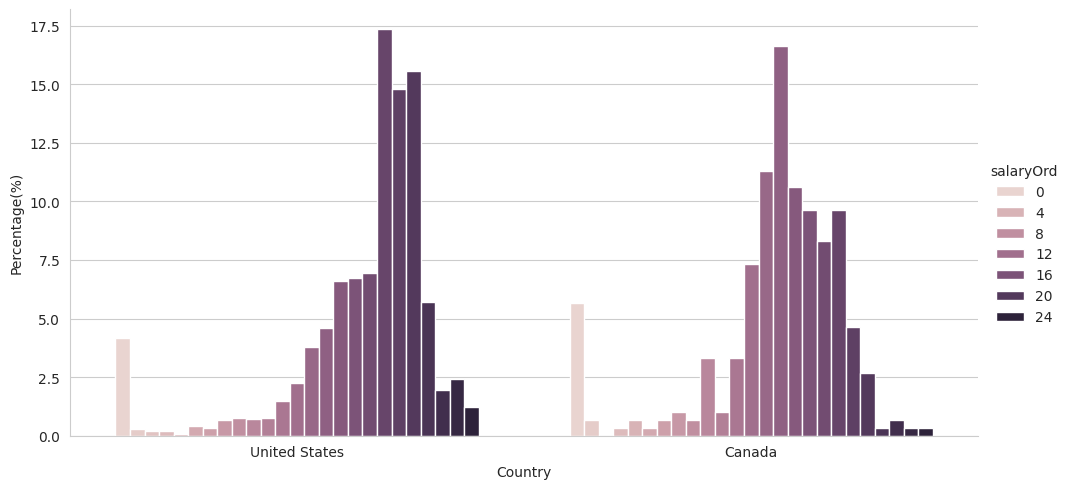

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'salaryOrd'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True).sort_index(ascending=False)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'),
       x=x,y='percent',
       hue=y,kind='bar',
       height=5, aspect=2, legend_out=True)
 .set_axis_labels("Country", "Percentage(%)")
 .set_titles("{col_name} {col_var}")
 .set(xticks=[0,1], xticklabels=['United States', 'Canada'])
 .savefig("US-Can salary distribution.png"))



In [153]:
dfvis.groupby('country')['salaryOrd'].mean()

country
Canada                      13.727575
United States of America    16.654171
Name: salaryOrd, dtype: float64

In [154]:
dfvis.groupby('country')['salaryOrd'].median()

country
Canada                      14.0
United States of America    18.0
Name: salaryOrd, dtype: float64

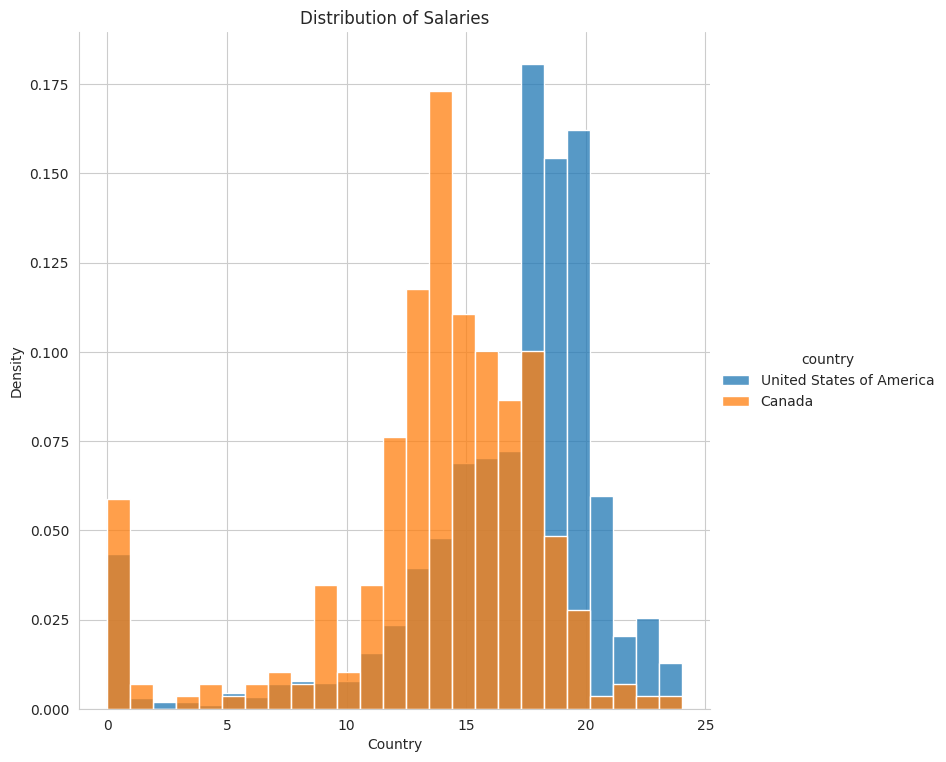

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
g = sns.FacetGrid(dfvis, hue='country', height=7.5)

g.map(sns.histplot,
      'salaryOrd',
      stat="density", bins=25,
      kde=False).add_legend().savefig("Can-US salary distribution.png")

g.set(xlabel='Country',
      ylabel='Density',
      title='Distribution of Salaries')

In [156]:
(dfvis
.groupby('country')['gender']
.value_counts(ascending=False, normalize=True)
.mul(100))

country                   gender                 
Canada                    Male                       74.366197
                          Female                     21.971831
                          Prefer not to say           2.816901
                          Prefer to self-describe     0.845070
United States of America  Male                       79.268783
                          Female                     18.400964
                          Prefer not to say           2.049016
                          Prefer to self-describe     0.281237
Name: proportion, dtype: float64

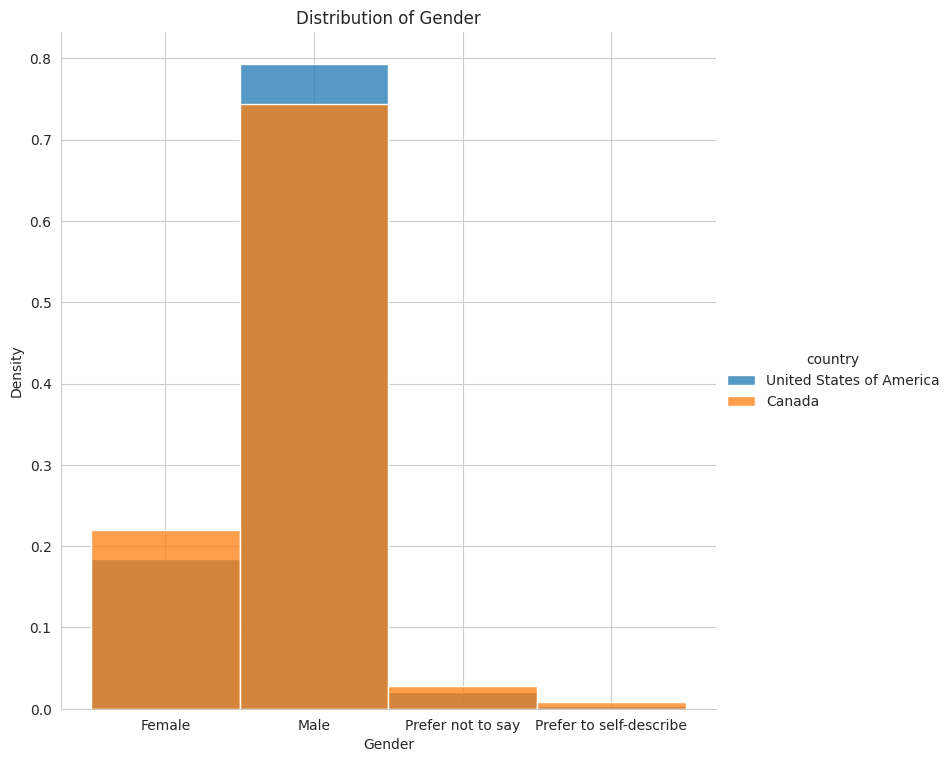

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
g = sns.FacetGrid(dfvis, hue='country', height=7.5)

g.map(sns.histplot,
      'gender',
      stat="density", bins=3,
      kde=False).add_legend().savefig("Can-US gender distribution.png")

g.set(xlabel='Gender',
      ylabel='Density',
      title='Distribution of Gender')

In [158]:
dfvis['age'].value_counts()

age
30-34    562
25-29    549
35-39    415
40-44    299
45-49    247
22-24    200
50-54    189
55-59    145
60-69    140
18-21     54
70+       44
Name: count, dtype: int64

In [159]:
(dfvis
.groupby('country')['age']
.value_counts(ascending=False, normalize=True)
.mul(100))

country                   age  
Canada                    30-34    19.718310
                          25-29    18.028169
                          35-39    13.521127
                          40-44    10.704225
                          22-24     9.859155
                          45-49     8.450704
                          50-54     6.760563
                          55-59     5.633803
                          18-21     2.816901
                          60-69     2.535211
                          70+       1.971831
United States of America  30-34    19.766975
                          25-29    19.485737
                          35-39    14.744877
                          40-44    10.486139
                          45-49     8.718361
                          50-54     6.629168
                          22-24     6.629168
                          60-69     5.263158
                          55-59     5.022097
                          18-21     1.767778
                       

In [160]:
dfvis["ageOrd"]=dfvis["age"]
dfvis['ageOrd'].head()

0    22-24
1    30-34
2    50-54
3    35-39
4    30-34
Name: ageOrd, dtype: object

In [161]:
dfvis['ageOrd'].replace({"18-21":0, "22-24":1,"25-29":2,"30-34":3,
                                      "35-39":4, "40-44":5, "45-49":6, "50-54":7, "55-59":8,
                                      "60-69":9, "70+":10}, inplace=True)
dfvis["ageOrd"].value_counts()

ageOrd
3     562
2     549
4     415
5     299
6     247
1     200
7     189
8     145
9     140
0      54
10     44
Name: count, dtype: int64

In [162]:
dfvis.groupby('country')['ageOrd'].mean()

country
Canada                      3.983099
United States of America    4.174367
Name: ageOrd, dtype: float64

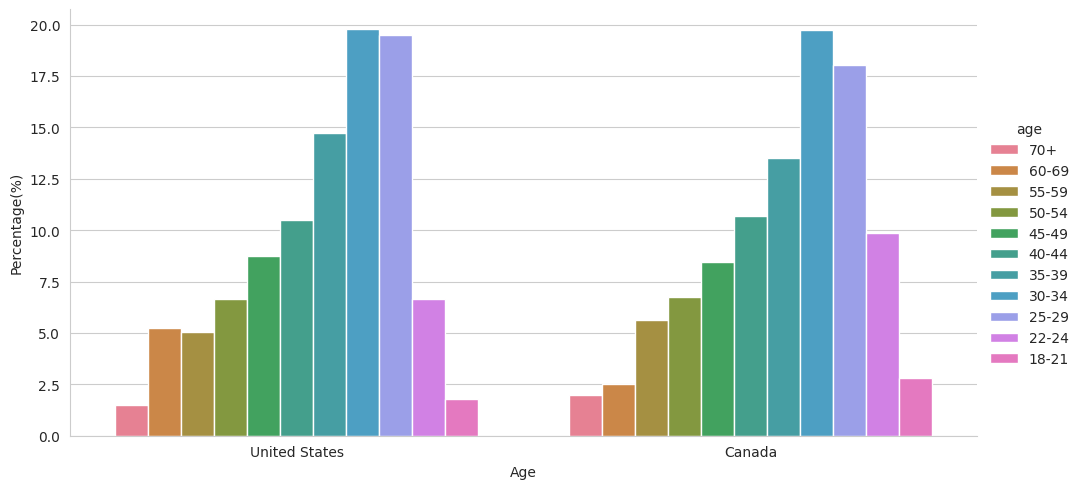

In [163]:
x,y = 'country', 'age'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True).sort_index(ascending=False)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'),
       x=x,y='percent',
       hue=y,kind='bar',
       height=5, aspect=2, legend_out=True)
 .set_axis_labels("Age", "Percentage(%)")
 .set_titles("{col_name} {col_var}")
 .set(xticks=[0,1], xticklabels=['United States', 'Canada'])
 .savefig("US-Can age distribution.png"))

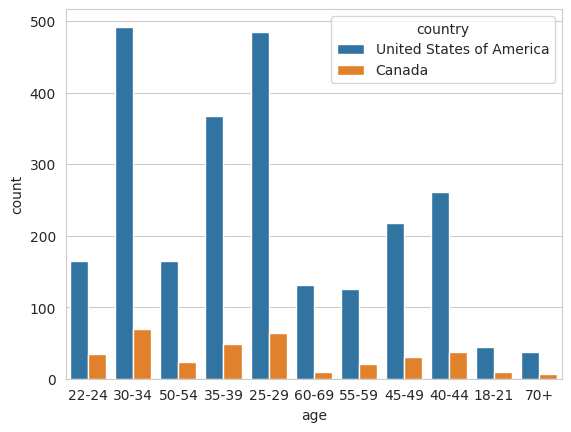

In [164]:
ax=sns.countplot(x='age', data=dfvis,
                hue='country')

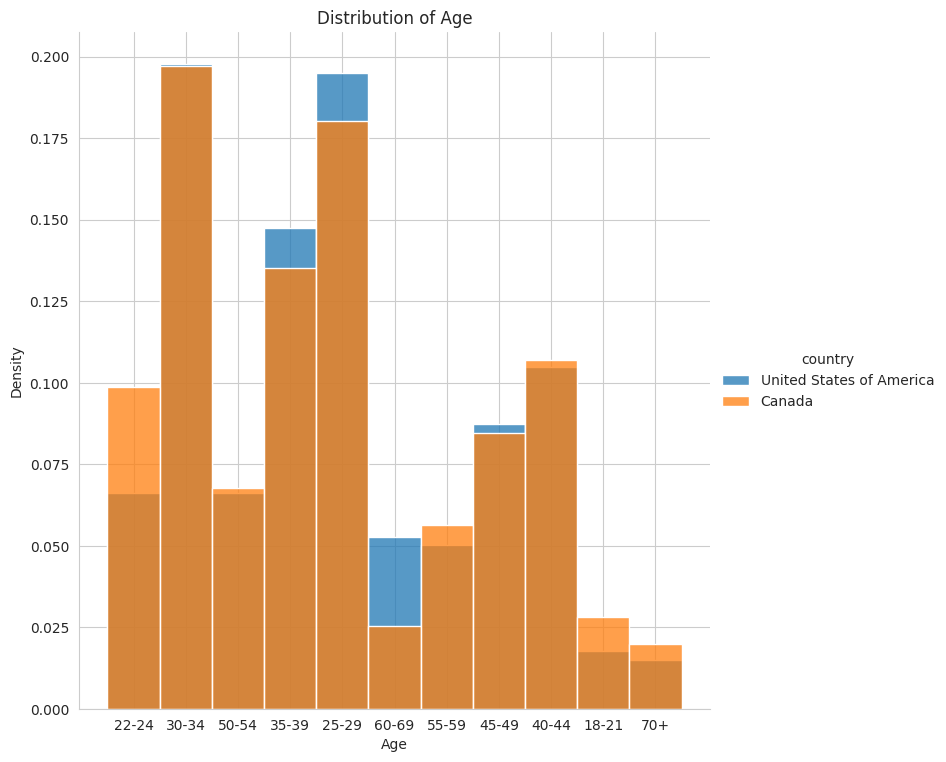

In [165]:
g = sns.FacetGrid(dfvis, hue='country', height=7.5)

g.map(sns.histplot,
      'age',
      stat="density", bins=11,
      kde=False).add_legend().savefig("Can-US age distribution.png")

g.set(xlabel='Age',
      ylabel='Density',
      title='Distribution of Age')

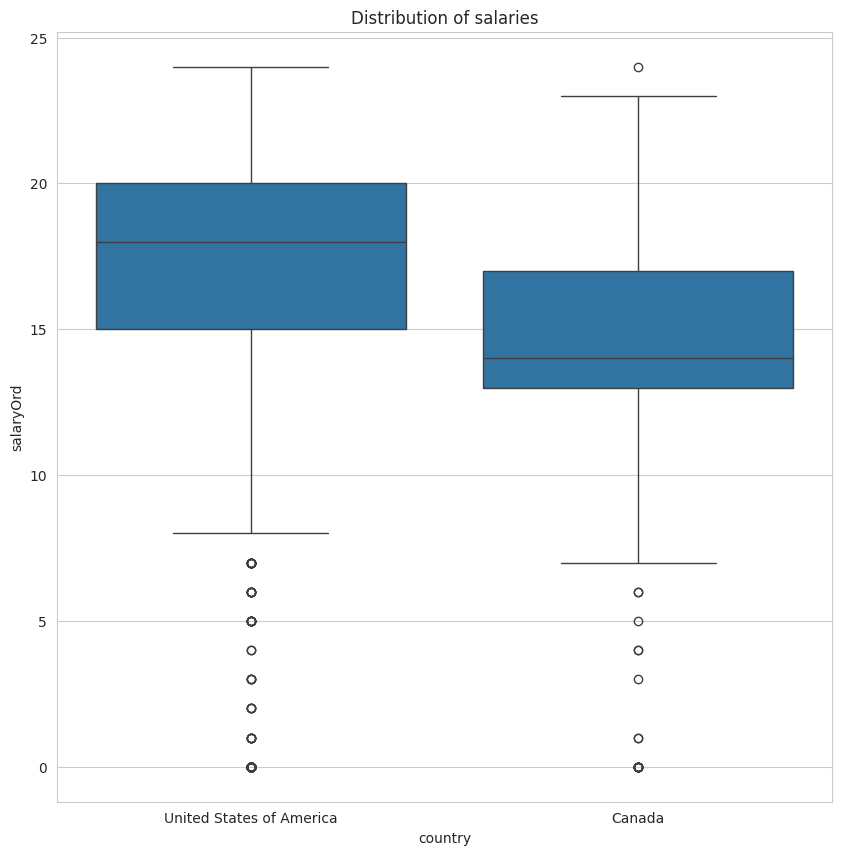

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

g = sns.boxplot(x='country', y='salaryOrd', data=dfvis, ax=ax)
g.set(title='Distribution of salaries')
g.xaxis.get_ticklabels()
fig = g.get_figure()
fig.savefig("US-Can salary distribution boxplot.png")

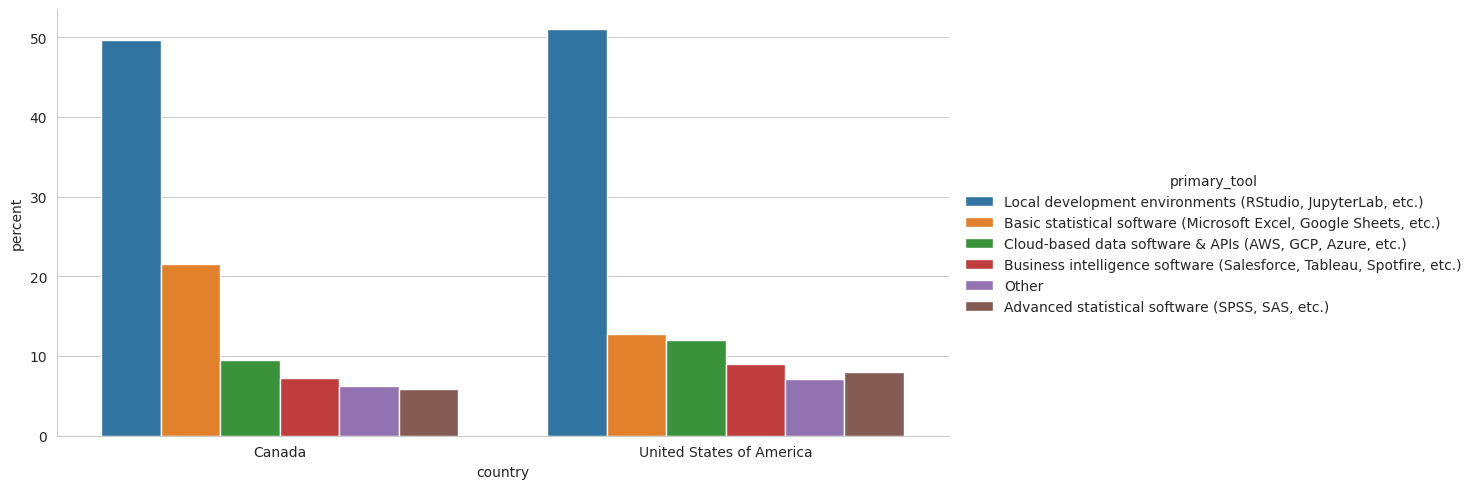

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'primary_tool'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'),
       x=x,y='percent',
       hue=y,kind='bar',
       height=5, aspect=2,)
 .savefig("primary_tool.png"))

In [168]:
(dfvis
.groupby('country')['primary_tool']
.value_counts(ascending=False, normalize=True)
.mul(100))

country                   primary_tool                                                        
Canada                    Local development environments (RStudio, JupyterLab, etc.)              49.635036
                          Basic statistical software (Microsoft Excel, Google Sheets, etc.)       21.532847
                          Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                 9.489051
                          Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     7.299270
                          Other                                                                    6.204380
                          Advanced statistical software (SPSS, SAS, etc.)                          5.839416
United States of America  Local development environments (RStudio, JupyterLab, etc.)              50.976465
                          Basic statistical software (Microsoft Excel, Google Sheets, etc.)       12.769154
                          Cloud-based dat

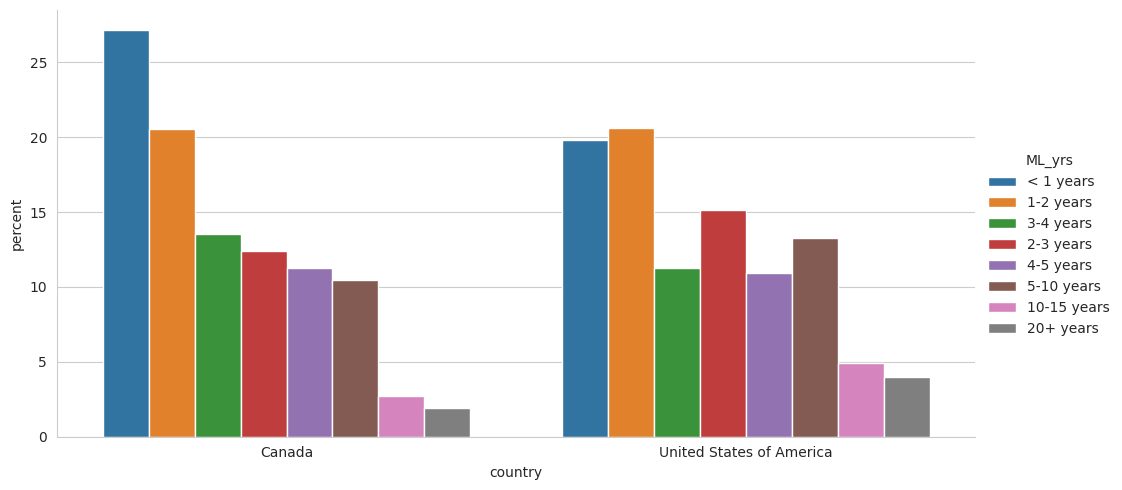

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'ML_yrs'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'),
       x=x,y='percent',
       hue=y,kind='bar',
       height=5, aspect=2,))

In [170]:
(dfvis
.groupby('country')['ML_yrs']
.value_counts(ascending=False, normalize=True)
.mul(100))

country                   ML_yrs     
Canada                    < 1 years      27.131783
                          1-2 years      20.542636
                          3-4 years      13.565891
                          2-3 years      12.403101
                          4-5 years      11.240310
                          5-10 years     10.465116
                          10-15 years     2.713178
                          20+ years       1.937984
United States of America  1-2 years      20.631579
                          < 1 years      19.842105
                          2-3 years      15.105263
                          5-10 years     13.263158
                          3-4 years      11.263158
                          4-5 years      10.947368
                          10-15 years     4.947368
                          20+ years       4.000000
Name: proportion, dtype: float64

In [171]:
dfvis['ML_yrsOrd']=dfvis['ML_yrs']
dfvis.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs,salaryOrd,ageOrd,ML_yrsOrd
0,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years,16.0,1,3-4 years
1,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years,17.0,3,2-3 years
2,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years,19.0,7,1-2 years
3,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years,19.0,4,2-3 years
4,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years,20.0,3,3-4 years


In [172]:
dfvis['ML_yrs'].value_counts()

ML_yrs
< 1 years      447
1-2 years      445
2-3 years      319
5-10 years     279
3-4 years      249
4-5 years      237
10-15 years    101
20+ years       81
Name: count, dtype: int64

In [173]:
dfvis['ML_yrsOrd'].replace({'< 1 years':0, '1-2 years':1, '2-3 years':2,
                           '3-4 years':3, '4-5 years':4, '5-10 years':5,
                           '10-15 years':6, '20+ years':7}, inplace=True)
dfvis.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs,salaryOrd,ageOrd,ML_yrsOrd
0,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years,16.0,1,3.0
1,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years,17.0,3,2.0
2,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years,19.0,7,1.0
3,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years,19.0,4,2.0
4,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years,20.0,3,3.0


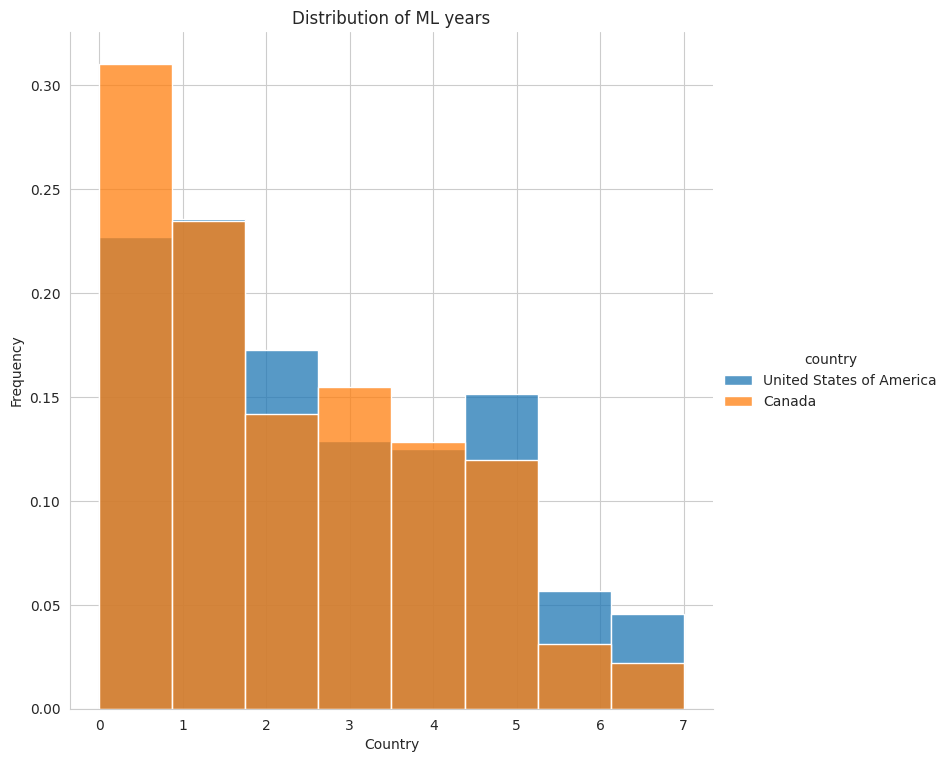

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
g = sns.FacetGrid(dfvis, hue='country', height=7.5)

g.map(sns.histplot,
      'ML_yrsOrd',
      stat="density", bins=8,
      kde=False).add_legend()

g.set(xlabel='Country',
      ylabel='Frequency',
      title='Distribution of ML years')

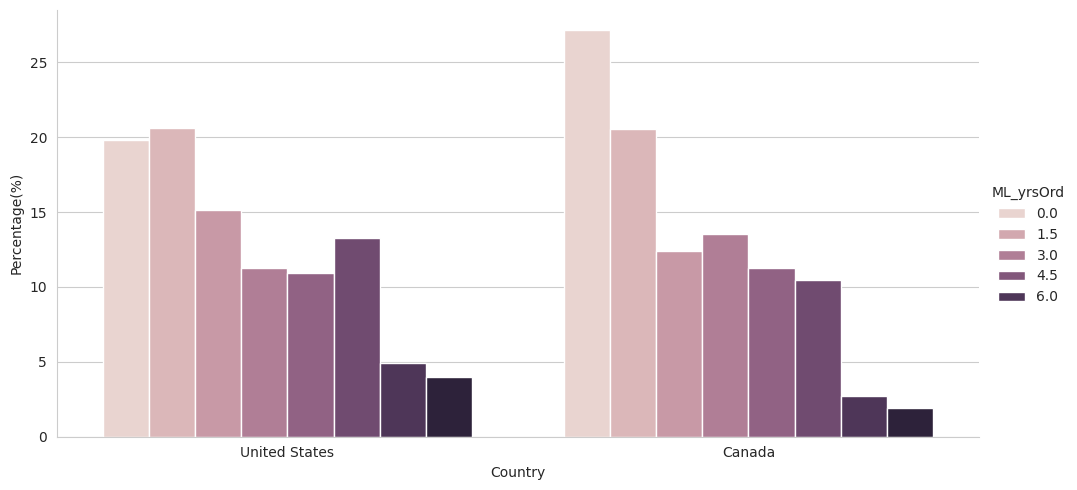

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'ML_yrsOrd'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True).sort_index(ascending=False)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'),
       x=x,y='percent',
       hue=y,kind='bar',
       height=5, aspect=2, legend_out=True)
 .set_axis_labels("Country", "Percentage(%)")
 .set_titles("{col_name} {col_var}")
 .set(xticks=[0,1], xticklabels=['United States', 'Canada'])
 .savefig("Machine learning years distribution.png"))

<center><h1>Modelling & Evaluation</h1></center><a name="modellingcode"></a>

>[Return to table of contents](#ToC)

### Pre-processing: reformatting features and normalizing values for ML models

In [176]:
dfML=newdf
dfML.shape

(2844, 27)

In [177]:
dfML["age"].value_counts()

age
30-34    562
25-29    549
35-39    415
40-44    299
45-49    247
22-24    200
50-54    189
55-59    145
60-69    140
18-21     54
70+       44
Name: count, dtype: int64

In [178]:
dfML["age"].replace({"18-21":0,"22-24":1,"25-29":2,"30-34":3,"35-39":4,"40-44":5,"45-49":6,"50-54":7,"55-59":8,"60-69":9,"70+":10}, inplace=True)

In [179]:
dfML["age"].value_counts()

age
3     562
2     549
4     415
5     299
6     247
1     200
7     189
8     145
9     140
0      54
10     44
Name: count, dtype: int64

In [180]:
dfML["country"].value_counts()

country
United States of America    2489
Canada                       355
Name: count, dtype: int64

In [181]:
dfML["gender"].replace({"Male":0, "Female":1,"Prefer not to say":2,"Prefer to self-describe":2}, inplace=True)

In [182]:
dfML[["gender"]].value_counts()

gender
0         2237
1          536
2           71
Name: count, dtype: int64

In [183]:
dfML.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs,salaryOrd,ageOrd,ML_yrsOrd
0,1,1,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years,16.0,1,3.0
1,3,0,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years,17.0,3,2.0
2,7,1,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years,19.0,7,1.0
3,4,0,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years,19.0,4,2.0
4,3,1,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years,20.0,3,3.0


In [184]:
dfML["country"].replace({"United States of America":0, "Canada":1}, inplace=True)
dfML.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs,salaryOrd,ageOrd,ML_yrsOrd
0,1,1,0,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years,16.0,1,3.0
1,3,0,0,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years,17.0,3,2.0
2,7,1,0,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years,19.0,7,1.0
3,4,0,0,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years,19.0,4,2.0
4,3,1,0,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years,20.0,3,3.0


In [185]:
# reduce the number of features to build and train a model
dfML2=dfML.loc[:, "age":"primary_tool"]
dfML2.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool
0,1,1,0,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)"
1,3,0,0,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
2,7,1,0,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
3,4,0,0,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
4,3,1,0,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)"


In [186]:
dfML2['salaryOrd']=dfML['salaryOrd']

In [187]:
dfML2.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,salaryOrd
0,1,1,0,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",16.0
1,3,0,0,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0
2,7,1,0,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
3,4,0,0,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
4,3,1,0,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0


In [188]:
dfML2=dfML2.drop(['salary'], axis=1)
dfML2.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,primary_tool,salaryOrd
0,1,1,0,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","Local development environments (RStudio, JupyterLab, etc.)",16.0
1,3,0,0,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0
2,7,1,0,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
3,4,0,0,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
4,3,1,0,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0


In [189]:
dfML2['cpny_size'].unique() #this variable is ordinal, so we're gonna recode accordingly

array(['> 10,000 employees', '50-249 employees', '250-999 employees',
       '1000-9,999 employees', '0-49 employees', nan], dtype=object)

In [190]:
dfML2["cpny_size"].replace({"0-49 employees":0, "50-249 employees":1,"250-999 employees":2,"1000-9,999 employees":3, "> 10,000 employees":4}, inplace=True)
dfML2["cpny_size"].head()

0    4.0
1    4.0
2    1.0
3    2.0
4    4.0
Name: cpny_size, dtype: float64

In [191]:
dfML2['team_size'].unique() # same here

array(['20+', '1-2', '10-14', '3-4', '5-9', '15-19', '0', nan],
      dtype=object)

In [192]:
dfML2['team_size'].replace({'0':0, '1-2':1, '3-4':2, '5-9':3, '10-14':4, '15-19':5, '20+':6}, inplace=True)
dfML2['team_size'].head()

0    6.0
1    6.0
2    1.0
3    4.0
4    6.0
Name: team_size, dtype: float64

In [193]:
dfML2['education'].unique() # this is not ordinal, so we'll use One-Hot Encoding later (see next section)

array(['Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer', 'Professional degree',
       'Some college/university study without earning a bachelor’s degree',
       'No formal education past high school', nan], dtype=object)

In [194]:
dfML2['ML_methods'].unique() # this is not ordinal, so we'll use One-Hot Encoding later (see next section)

array(['We recently started using ML methods (i.e., models in production for less than 2 years)',
       'I do not know',
       'We use ML methods for generating insights (but do not put working models into production)',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We are exploring ML methods (and may one day put a model into production)',
       'No (we do not use ML methods)', nan], dtype=object)

In [195]:
dfML2['primary_tool'].unique() # this is not ordinal, so we'll use One-Hot Encoding later (see next section)

array(['Local development environments (RStudio, JupyterLab, etc.)',
       'Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)', nan,
       'Other',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       'Advanced statistical software (SPSS, SAS, etc.)'], dtype=object)

In [196]:
dfML2['job'].unique() # this is not ordinal, so we'll use One-Hot Encoding later (see next section)

array(['Data Scientist', 'Product/Project Manager', 'Data Analyst',
       'Other', 'Research Scientist', 'Data Engineer', 'Business Analyst',
       'Software Engineer', 'Statistician', 'DBA/Database Engineer', nan],
      dtype=object)

In [197]:
dfML2.isna().sum()

age               0
gender            0
country           0
education        50
job              81
cpny_size       116
team_size       186
ML_methods      241
primary_tool    573
salaryOrd       409
dtype: int64

In [198]:
dfML3=dfML2.dropna() # decide to simply drop the rows in which there are missing values
dfML3.shape

(2271, 10)

In [199]:
dfML3.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,primary_tool,salaryOrd
0,1,1,0,Bachelor’s degree,Data Scientist,4.0,6.0,"We recently started using ML methods (i.e., models in production for less than 2 years)","Local development environments (RStudio, JupyterLab, etc.)",16.0
1,3,0,0,Master’s degree,Product/Project Manager,4.0,6.0,I do not know,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0
2,7,1,0,Master’s degree,Data Analyst,1.0,1.0,We use ML methods for generating insights (but do not put working models into production),"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
3,4,0,0,Bachelor’s degree,Other,2.0,4.0,"We have well established ML methods (i.e., models in production for more than 2 years)","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
4,3,1,0,Master’s degree,Research Scientist,4.0,6.0,"We recently started using ML methods (i.e., models in production for less than 2 years)","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0


In [200]:
dfML3['country'].value_counts()

country
0    1997
1     274
Name: count, dtype: int64

### Features Selection & One-Hot Encoding (for categorical variables)

In [201]:
Features = dfML3[['age', 'gender', 'education', 'job', 'cpny_size', 'team_size', 'ML_methods', 'primary_tool', 'salaryOrd']]
Features = pd.concat([Features, pd.get_dummies(dfML3['ML_methods'])], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,ML_methods,primary_tool,salaryOrd,I do not know,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production)
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,"We recently started using ML methods (i.e., models in production for less than 2 years)","Local development environments (RStudio, JupyterLab, etc.)",16.0,False,False,False,False,True,False
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,I do not know,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0,True,False,False,False,False,False
2,7,1,Master’s degree,Data Analyst,1.0,1.0,We use ML methods for generating insights (but do not put working models into production),"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,False,False,False,False,False,True
3,4,0,Bachelor’s degree,Other,2.0,4.0,"We have well established ML methods (i.e., models in production for more than 2 years)","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,False,False,False,True,False,False
4,3,1,Master’s degree,Research Scientist,4.0,6.0,"We recently started using ML methods (i.e., models in production for less than 2 years)","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0,False,False,False,False,True,False


In [202]:
Features=Features.drop(['ML_methods'], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,primary_tool,salaryOrd,I do not know,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production)
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,"Local development environments (RStudio, JupyterLab, etc.)",16.0,False,False,False,False,True,False
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0,True,False,False,False,False,False
2,7,1,Master’s degree,Data Analyst,1.0,1.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,False,False,False,False,False,True
3,4,0,Bachelor’s degree,Other,2.0,4.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,False,False,False,True,False,False
4,3,1,Master’s degree,Research Scientist,4.0,6.0,"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0,False,False,False,False,True,False


In [203]:
Features=Features.drop(['I do not know'], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,primary_tool,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production)
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,"Local development environments (RStudio, JupyterLab, etc.)",16.0,False,False,False,True,False
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0,False,False,False,False,False
2,7,1,Master’s degree,Data Analyst,1.0,1.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,False,False,False,False,True
3,4,0,Bachelor’s degree,Other,2.0,4.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,False,False,True,False,False
4,3,1,Master’s degree,Research Scientist,4.0,6.0,"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0,False,False,False,True,False


In [204]:
Features = pd.concat([Features, pd.get_dummies(dfML3['primary_tool'])], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,primary_tool,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production),"Advanced statistical software (SPSS, SAS, etc.)","Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Local development environments (RStudio, JupyterLab, etc.)",Other
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,"Local development environments (RStudio, JupyterLab, etc.)",16.0,False,False,False,True,False,False,False,False,False,True,False
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0,False,False,False,False,False,False,True,False,False,False,False
2,7,1,Master’s degree,Data Analyst,1.0,1.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,False,False,False,False,True,False,True,False,False,False,False
3,4,0,Bachelor’s degree,Other,2.0,4.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,False,False,True,False,False,False,True,False,False,False,False
4,3,1,Master’s degree,Research Scientist,4.0,6.0,"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0,False,False,False,True,False,False,False,False,True,False,False


In [205]:
Features=Features.drop(['primary_tool'], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production),"Advanced statistical software (SPSS, SAS, etc.)","Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Local development environments (RStudio, JupyterLab, etc.)",Other
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,16.0,False,False,False,True,False,False,False,False,False,True,False
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,17.0,False,False,False,False,False,False,True,False,False,False,False
2,7,1,Master’s degree,Data Analyst,1.0,1.0,19.0,False,False,False,False,True,False,True,False,False,False,False
3,4,0,Bachelor’s degree,Other,2.0,4.0,19.0,False,False,True,False,False,False,True,False,False,False,False
4,3,1,Master’s degree,Research Scientist,4.0,6.0,20.0,False,False,False,True,False,False,False,False,True,False,False


In [206]:
Features = pd.concat([Features, pd.get_dummies(dfML3['education'])], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)",...,"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Local development environments (RStudio, JupyterLab, etc.)",Other,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,16.0,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,17.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,7,1,Master’s degree,Data Analyst,1.0,1.0,19.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,4,0,Bachelor’s degree,Other,2.0,4.0,19.0,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,3,1,Master’s degree,Research Scientist,4.0,6.0,20.0,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [207]:
Features=Features.drop(['education'], axis=1)
Features.head()

,age,gender,job,cpny_size,team_size,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",...,"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Local development environments (RStudio, JupyterLab, etc.)",Other,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree
0,1,1,Data Scientist,4.0,6.0,16.0,False,False,False,True,...,False,True,False,True,False,False,False,False,False,False
1,3,0,Product/Project Manager,4.0,6.0,17.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,7,1,Data Analyst,1.0,1.0,19.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,4,0,Other,2.0,4.0,19.0,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,3,1,Research Scientist,4.0,6.0,20.0,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False


In [208]:
Features.columns

Index(['age', 'gender', 'job', 'cpny_size', 'team_size', 'salaryOrd',
       'No (we do not use ML methods)',
       'We are exploring ML methods (and may one day put a model into production)',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)',
       'We use ML methods for generating insights (but do not put working models into production)',
       'Advanced statistical software (SPSS, SAS, etc.)',
       'Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
       'Local development environments (RStudio, JupyterLab, etc.)', 'Other',
       'Bachelor’s degree', 'Doctoral degree', 'I prefer not to answer',
       'Master’s degree', 'No formal education past high school',
       'Profes

In [209]:
Features = pd.concat([Features, pd.get_dummies(dfML3['job'])], axis=1)
Features=Features.drop(['job'], axis=1)
Features.head()

,age,gender,cpny_size,team_size,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production),...,Business Analyst,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Other,Product/Project Manager,Research Scientist,Software Engineer,Statistician
0,1,1,4.0,6.0,16.0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,3,0,4.0,6.0,17.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,7,1,1.0,1.0,19.0,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,4,0,2.0,4.0,19.0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,3,1,4.0,6.0,20.0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [210]:
#There was a problem of missing values when modelling, so we need to deal with them before
# we can model a Logistic Regression. The problem was that the shape of X did not match the shape of Y.
# We fixed this and now we can move on.
Features.shape

(2271, 33)

In [211]:
Features2=Features.dropna()
Features2.shape

(2271, 33)

In [212]:
# Let's further reduce our subset of predictors
X=np.asarray(Features2)
X[0:5]

array([[1, 1, 4.0, 6.0, 16.0, False, False, False, True, False, False,
        False, False, False, True, False, True, False, False, False,
        False, False, False, False, False, False, False, True, False,
        False, False, False, False],
       [3, 0, 4.0, 6.0, 17.0, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, True,
        False, False, False, False, False, False, False, False, False,
        True, False, False, False],
       [7, 1, 1.0, 1.0, 19.0, False, False, False, False, True, False,
        True, False, False, False, False, False, False, False, True,
        False, False, False, False, False, True, False, False, False,
        False, False, False, False],
       [4, 0, 2.0, 4.0, 19.0, False, False, True, False, False, False,
        True, False, False, False, False, True, False, False, False,
        False, False, False, False, False, False, False, False, True,
        False, False, False, False],
       [3, 

In [213]:
y = np.asarray(dfML3['country'].dropna())
y [0:5]

array([0, 0, 0, 0, 0])

In [214]:
y.shape

(2271,)

### Normalizing the data

In [215]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.39044321,  1.69534979,  1.13817256,  1.17289862, -0.08494148,
        -0.37501046, -0.46447686, -0.63528314,  1.94708481, -0.37271537,
        -0.289844  , -0.40056169, -0.31075988, -0.36501169,  0.9838382 ,
        -0.27530613,  1.81020335, -0.53338753, -0.06976573, -0.96665002,
        -0.05945696, -0.12328393, -0.19958749, -0.2245357 , -0.10761641,
        -0.37118129, -0.21796611,  1.41421356, -0.40056169, -0.24741656,
        -0.31920571, -0.39462031, -0.13389989],
       [-0.52425297, -0.48603229,  1.13817256,  1.17289862,  0.12159181,
        -0.37501046, -0.46447686, -0.63528314, -0.51358831, -0.37271537,
        -0.289844  ,  2.49649436, -0.31075988, -0.36501169, -1.01642729,
        -0.27530613, -0.55242412, -0.53338753, -0.06976573,  1.03450057,
        -0.05945696, -0.12328393, -0.19958749, -0.2245357 , -0.10761641,
        -0.37118129, -0.21796611, -0.70710678, -0.40056169,  4.04176668,
        -0.31920571, -0.39462031, -0.13389989],
       [ 1.20812752,  1.6953

### Logistic Regression Modelling

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1816, 33) (1816,)
Test set: (455, 33) (455,)


In [217]:
y_train[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0])

In [218]:
y_test[0:50]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0])

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.20, solver='saga').fit(X_train,y_train) #the 'saga' solver is better for large datasets.
LR

LogisticRegression(C=0.2, solver='saga')

In [220]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [221]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8744493392070485
Test set Accuracy:  0.8945054945054945


In [222]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.85127872, 0.14872128],
       [0.87360061, 0.12639939],
       [0.90152321, 0.09847679],
       [0.71229724, 0.28770276],
       [0.91860333, 0.08139667],
       [0.91267982, 0.08732018],
       [0.90996936, 0.09003064],
       [0.89819696, 0.10180304],
       [0.89042031, 0.10957969],
       [0.88799345, 0.11200655],
       [0.91948294, 0.08051706],
       [0.90376983, 0.09623017],
       [0.88111944, 0.11888056],
       [0.94201642, 0.05798358],
       [0.90793695, 0.09206305],
       [0.91611467, 0.08388533],
       [0.87049486, 0.12950514],
       [0.91544108, 0.08455892],
       [0.81767373, 0.18232627],
       [0.94600112, 0.05399888],
       [0.60829315, 0.39170685],
       [0.87693018, 0.12306982],
       [0.84820932, 0.15179068],
       [0.90309342, 0.09690658],
       [0.9039011 , 0.0960989 ],
       [0.93508352, 0.06491648],
       [0.86563293, 0.13436707],
       [0.88425106, 0.11574894],
       [0.61664435, 0.38335565],
       [0.91773557, 0.08226443],
       [0.

In [223]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       409
           1       0.00      0.00      0.00        46

    accuracy                           0.89       455
   macro avg       0.45      0.50      0.47       455
weighted avg       0.81      0.89      0.85       455



### K-Nearest Neighbour

In [224]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1816, 33) (1816,)
Test set: (455, 33) (455,)


In [226]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 1, 0, 0, 0])

In [227]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8755506607929515
Test set Accuracy:  0.8923076923076924


In [228]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMat = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.81538462, 0.88131868, 0.86153846, 0.89230769, 0.89010989,
       0.9010989 , 0.8989011 , 0.9010989 , 0.8989011 , 0.8989011 ,
       0.8989011 , 0.8989011 , 0.8989011 , 0.8989011 , 0.8989011 ,
       0.8989011 , 0.8989011 , 0.8989011 , 0.8989011 , 0.8989011 ,
       0.8989011 , 0.8989011 , 0.8989011 , 0.8989011 , 0.8989011 ,
       0.8989011 , 0.8989011 , 0.8989011 , 0.8989011 ])

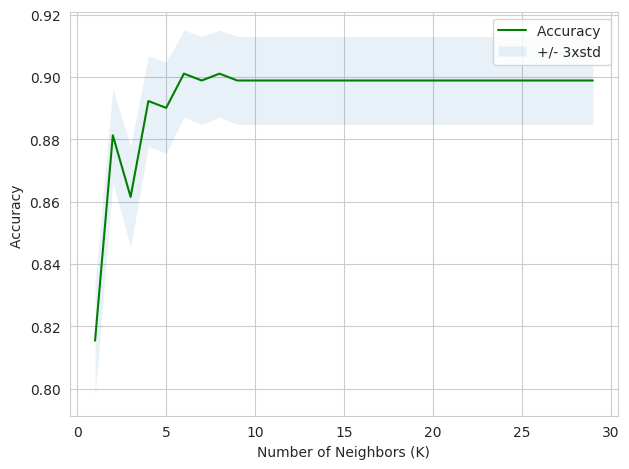

In [229]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [230]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9010989010989011 with k= 6


In [231]:
KNNfinal=KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)
KNNfinal

KNeighborsClassifier(n_neighbors=8)

### Decision Tree

In [232]:
from sklearn.tree import DecisionTreeClassifier

In [233]:
# sklearn does not support categorical variables. Fortunately, we already converted categorical variables to numerical features
# here we keep the same threshold (0.2, meaning 80% train and 20% test) for splitting the train-test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1816, 33) (1816,)
Test set: (455, 33) (455,)


In [234]:
countryTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
countryTree
countryTree.fit(X_train,y_train)
DTfinal=countryTree.fit(X_train, y_train)
DTfinal

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [235]:
# Decision Tree
predTree = countryTree.predict(X_test)
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8967032967032967


In [236]:
from sklearn.metrics import f1_score
f1_score(y_test, predTree, average='weighted')

0.8499458826225917

### Support Vector Machine

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1816, 33) (1816,)
Test set: (455, 33) (455,)


In [238]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
SVMfinal=clf.fit(X_train, y_train)
SVMfinal

SVC()

In [239]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

In [240]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.8510429385429386

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95       409
           1       0.00      0.00      0.00        46

    accuracy                           0.90       455
   macro avg       0.45      0.50      0.47       455
weighted avg       0.81      0.90      0.85       455

Confusion matrix, without normalization
[[409   0]
 [ 46   0]]


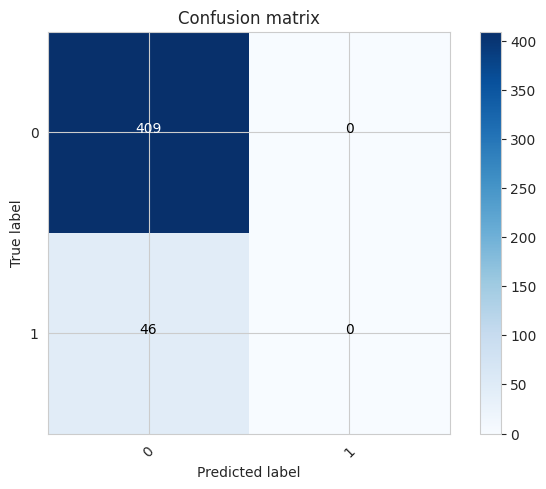

In [241]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Compute confusion matrix using the function provided by Saeed Aghabozorgi in the SVM example
# from the IBM Professional Data Science Certificate.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

> This is a problem. The models don't seem be to able to distinguish the features specific to the Canadian case ('1').

## Now we're ready to compare the performance of each model on the test set

### Logistic Regression

In [242]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)
# Here we need to be careful; log loss requires 'predict_proba', not simply 'predict'
yhat2 = LR.predict_proba(X_test)
print ("LogLoss: %.4f" % log_loss(y_test, yhat2))
# F1 score
yhat2=LR.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))

LogLoss: 0.3216
Avg F1-score: 0.8488


### K-Nearest-Neighbour

In [243]:
yhat = KNNfinal.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))

Avg F1-score: 0.8563


### Decision Tree Classifier

In [244]:
yhat3=DTfinal.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat3, average='weighted'))

Avg F1-score: 0.8499


### Support Vector Machine

In [245]:
yhat4=SVMfinal.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat4, average='weighted'))

Avg F1-score: 0.8510


<center><h1>End of Notebook</h1></center>

>[Return to table of contents](#ToC)